In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Step 1: Load the Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Step 2: Check if the dataset is clean
df.isnull().sum()  # Check for missing values
df.duplicated().sum()  # Check for duplicates
df.info()  # Check for data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
# Step 3: Separate Input variables and target variable
X = df.drop('species', axis=1)
y = df['species']


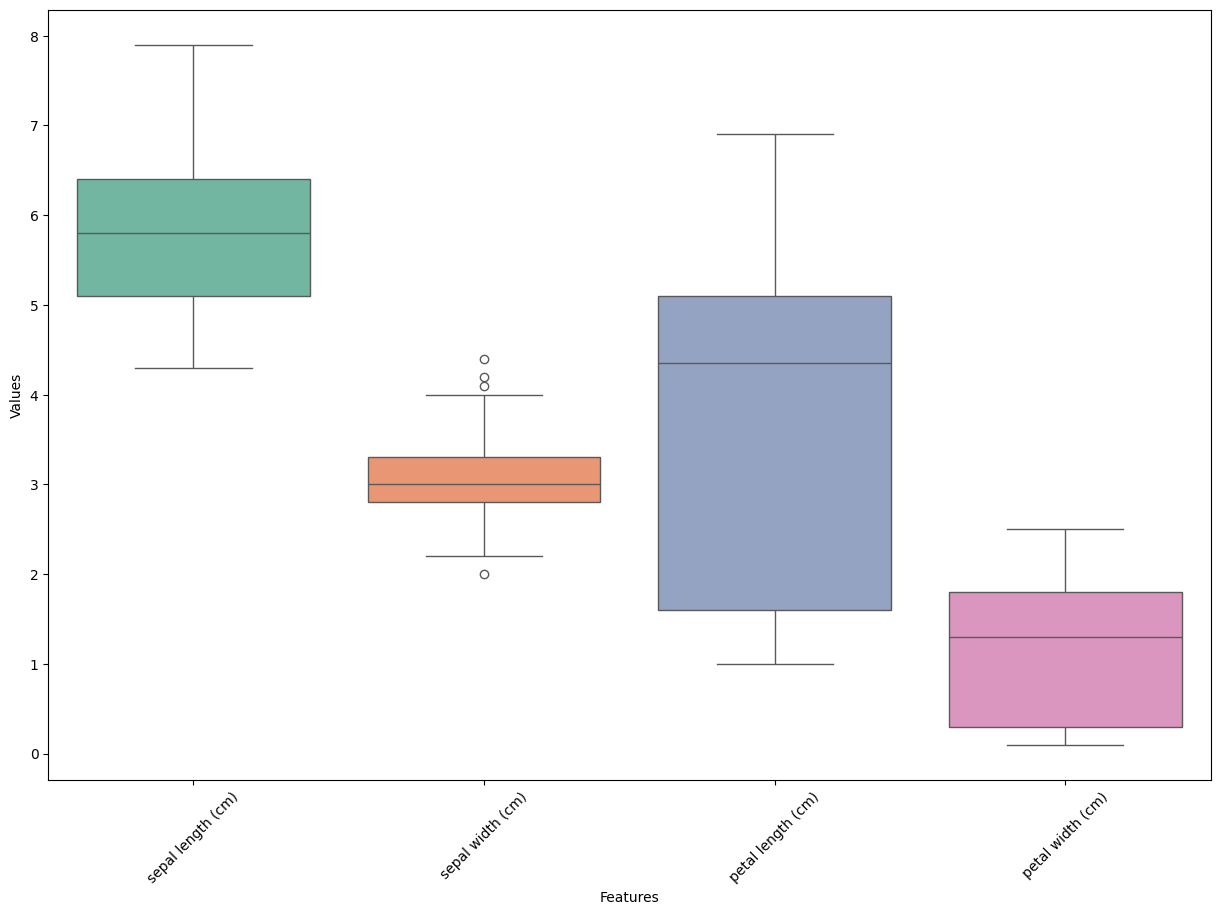

In [5]:
# Step 4: Check for outliers using boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=X, orient='v', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [6]:
# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Step 6: Split into Training and Testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Step 7: Train the Multi-Class Logistic Regression Model
lr = LogisticRegression(multi_class='ovr', max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

In [9]:
# Step 8: Predictions and Evaluation
y_pred = lr.predict(X_test)

In [10]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


In [11]:
# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [12]:
# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



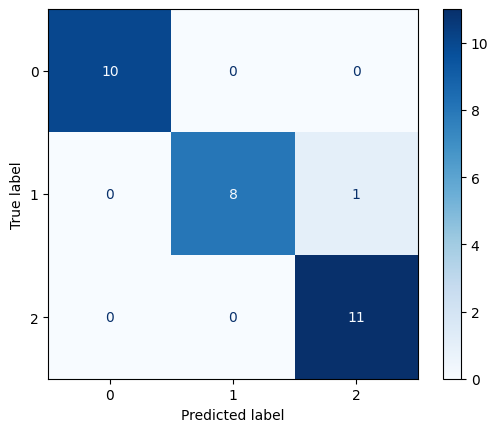

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [17]:
# Step 9: Model Deployment using Pickle
pickle.dump(scaler, open('scaler_iris.pkl', 'wb'))
pickle.dump(lr, open('model_lr_iris.pkl', 'wb'))

